**EDA 1**

solution 1 :

In [15]:
import pandas as pd
import numpy as np
df = pd.read_csv('/BIKE DETAILS.csv')
df



,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [11]:
df = pd.read_csv('/BIKE DETAILS.csv')
max_selling_price = df['selling_price'].max()
min_selling_price = df['selling_price'].min()
price_range = max_selling_price - min_selling_price
print("Maximum Selling Price:", max_selling_price)
print("Minimum Selling Price:", min_selling_price)
print("Range of Selling Prices:", price_range)

Maximum Selling Price: 760000
Minimum Selling Price: 5000
Range of Selling Prices: 755000


Question : What is the median selling price for bikes in the dataset
solution :

In [19]:
df = pd.read_csv('/BIKE DETAILS.csv')
median_selling_price = df['selling_price'].median()
print("Median Selling Price:", median_selling_price)

Median Selling Price: 45000.0


Question What is the most common seller type?

In [24]:
import pandas as pd
df = pd.read_csv('/BIKE DETAILS.csv')
import pandas as pd
df = pd.read_csv('/BIKE DETAILS.csv')
seller_counts = df['seller_type'].value_counts()
most_common_seller = seller_counts.idxmax()
print("Most Common Seller:",most_common_seller)

Most Common Seller: Individual


Question : How many bikes have driven more than 50,000 kilometers?

In [25]:
# Load the CSV file into a DataFrame
df = pd.read_csv('/BIKE DETAILS.csv')
bikes_over_50k = df[df['km_driven'] > 50000]
count_over_50k = len(bikes_over_50k)
print(count_over_50k)


170


Question : What is the average km_driven value for each ownership type?

In [26]:
df = pd.read_csv('/BIKE DETAILS.csv')
average_km_driven = df.groupby('owner')['km_driven'].mean()
print(average_km_driven)


owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


Question : What proportion of bikes are from the year 2015 or older?

In [28]:
df = pd.read_csv('/BIKE DETAILS.csv')
bikes_2015_or_older = df[df['year'] <= 2015]
proportion = len(bikes_2015_or_older) / len(df)
print(proportion)


0.5664467483506126


Question : What is the trend of missing values across the dataset?

In [29]:
df = pd.read_csv('/BIKE DETAILS.csv')
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("Missing Values:\n", missing_values)
print("\nMissing Percentage:\n", missing_percentage)


Missing Values:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Missing Percentage:
 name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64


Question : What is the highest ex_showroom_price recorded, and for which bike?

In [30]:
df = pd.read_csv('/BIKE DETAILS.csv')
max_price_index = df['ex_showroom_price'].idxmax()
bike_name = df.loc[max_price_index, 'name']
highest_price = df['ex_showroom_price'].max()
print("Bike Name:", bike_name)
print("Highest Ex-Showroom Price:", highest_price)


Bike Name: Harley-Davidson Street Bob
Highest Ex-Showroom Price: 1278000.0


Question : What is the total number of bikes listed by each seller type?

In [31]:
df = pd.read_csv('/BIKE DETAILS.csv')
seller_counts = df['seller_type'].value_counts()
print(seller_counts)


seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


Question : What is the relationship between selling_price and km_driven for first-owner bikes?

nan


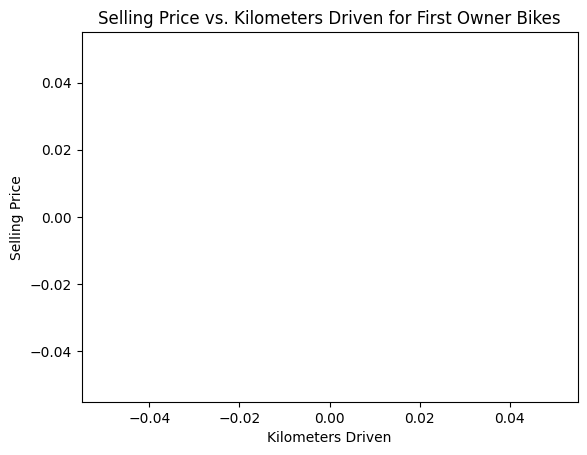

In [33]:
df = pd.read_csv('/BIKE DETAILS.csv')
first_owner_bikes = df[df['owner'] == 'First Owner']
correlation = first_owner_bikes['selling_price'].corr(first_owner_bikes['km_driven'])
print(correlation)
import matplotlib.pyplot as plt
plt.scatter(first_owner_bikes['km_driven'], first_owner_bikes['selling_price'])
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Kilometers Driven for First Owner Bikes')
plt.show()


Question : Identify and remove outliers in the km_driven column using the IQR method.

In [34]:
df = pd.read_csv('/BIKE DETAILS.csv')

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print("Original DataFrame Length:", len(df))
print("DataFrame Length after Outlier Removal:", len(df_no_outliers))


Original DataFrame Length: 1061
DataFrame Length after Outlier Removal: 1022


Question : Perform a bivariate analysis to visualize the relationship between year and selling_price.

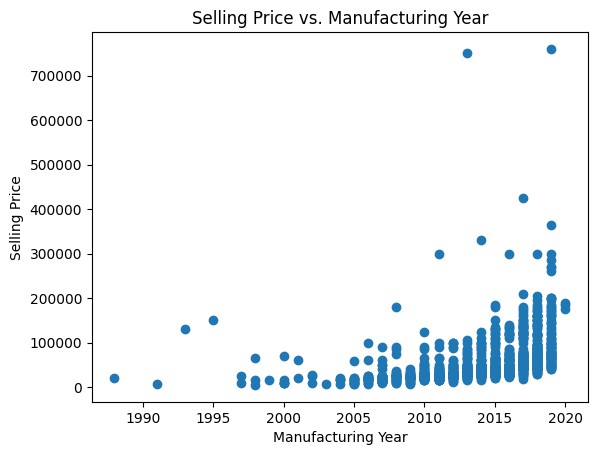

Correlation between Year and Selling Price: 0.40218840061474403


In [35]:
df = pd.read_csv('/BIKE DETAILS.csv')

import matplotlib.pyplot as plt
plt.scatter(df['year'], df['selling_price'])
plt.xlabel('Manufacturing Year')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Manufacturing Year')
plt.show()

correlation = df['year'].corr(df['selling_price'])
print("Correlation between Year and Selling Price:", correlation)


Question : What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

In [37]:
df = pd.read_csv('/BIKE DETAILS.csv')
df['bike_age'] = 2024 - df['year']

df['depreciation_per_year'] = df['selling_price'] / df['bike_age']
df['depreciation_per_year'] = df['depreciation_per_year'].replace([float('inf'), float('-inf')], float('nan'))

average_depreciation = df['depreciation_per_year'].mean(skipna=True)
print(average_depreciation)


8036.506822752407


Question : Which bike names are priced significantly above the average price for their manufacturing year?

In [40]:
df = pd.read_csv('/BIKE DETAILS.csv')
df = pd.read_csv('/BIKE DETAILS.csv')
average_price_per_year = df.groupby('year')['selling_price'].mean()

df = df.merge(average_price_per_year, left_on='year', right_index=True, suffixes=('', '_average'))
df['price_difference'] = df['selling_price'] - df['selling_price_average']
std_dev = df['price_difference'].std()
significant_bikes = df[df['price_difference'] > 2 * std_dev]['name'].unique()
print(significant_bikes)
significant_bikes = df[df['price_difference'] > 2 * std_dev]['name'].unique()
print(significant_bikes)


['Royal Enfield Bullet 350 [2007-2011]' 'Yamaha YZF R3'
 'Royal Enfield Continental GT 650' 'Harley-Davidson Street Bob'
 'KTM RC 390' 'Royal Enfield Interceptor 650'
 'Kawasaki Ninja 650 [2018-2019]' 'Suzuki GSX S750'
 'Harley-Davidson Street 750' 'BMW G310GS' 'KTM 390 Duke ABS [2013-2016]'
 'Royal Enfield Classic Signals' 'Royal Enfield Classic Chrome'
 'KTM 390 Duke' 'Kawasaki Ninja 300']
['Royal Enfield Bullet 350 [2007-2011]' 'Yamaha YZF R3'
 'Royal Enfield Continental GT 650' 'Harley-Davidson Street Bob'
 'KTM RC 390' 'Royal Enfield Interceptor 650'
 'Kawasaki Ninja 650 [2018-2019]' 'Suzuki GSX S750'
 'Harley-Davidson Street 750' 'BMW G310GS' 'KTM 390 Duke ABS [2013-2016]'
 'Royal Enfield Classic Signals' 'Royal Enfield Classic Chrome'
 'KTM 390 Duke' 'Kawasaki Ninja 300']


Question : Develop a correlation matrix for numeric columns and visualize it using a heatmap.

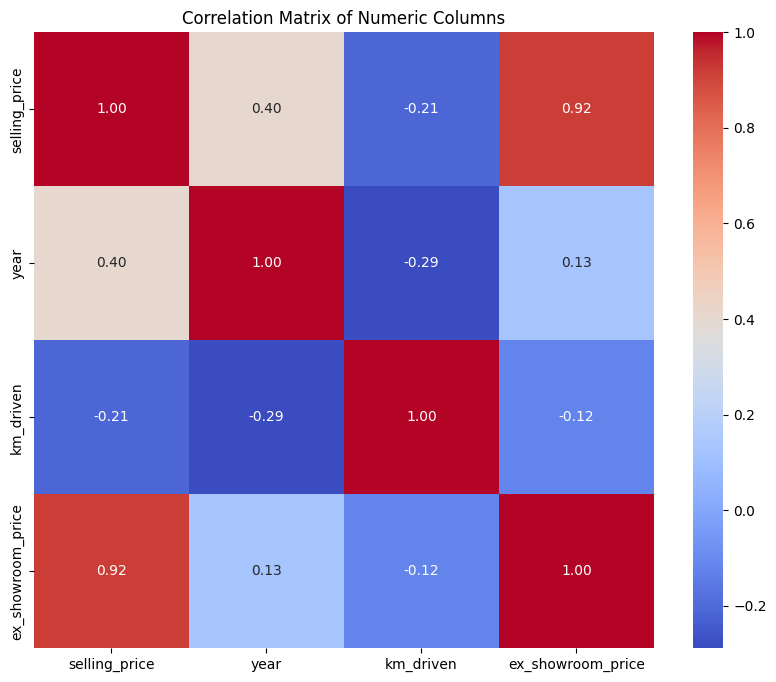

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/BIKE DETAILS.csv')
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()


EDA 2

SOLUTION 1 :

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/Car Sale.csv')
df




,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

try:
 df = pd.read_csv('/Car Sale.csv')
except FileNotFoundError:
 print("Error: '/Car Sale.csv' not found.  Make sure the file is in the correct directory.")
 exit()

df['Selling_Price'] = df['Selling_Price'].fillna(0)
df['Dealer'] = df['Dealer'].fillna('Unknown')

avg_price_by_dealer = df.groupby('Dealer')['Selling_Price'].mean()

print("Average selling price by dealer:\n", avg_price_by_dealer)
avg_price_by_dealer.plot(kind='bar', title='Average Selling Price by Dealer')
plt.ylabel('Average Selling Price')
plt.show()


solution 2

In [ ]:
import pandas as pd


# Load the dataset
try:
    df = pd.read_csv('/Car Sale.csv')
except FileNotFoundError:
    print("Error: 'Car Sale.csv' not found.  Make sure the file is in the correct directory.")
    exit()
df.columns = df.columns.str.strip().str.replace('[^a-zA-Z0-9_]', '', regex=True)

print(df.columns)

selling_price_col = 'Selling_Price' # Replace with the actual cleaned column name for selling price

df[selling_price_col] = df[selling_price_col].fillna(0)
df['Company'] = df['Company'].fillna('Unknown')
# Calculate the price variation (standard deviation) for each car brand
price_variation_by_brand = df.groupby('Company')[selling_price_col].std()

highest_variation_brand = price_variation_by_brand.sort_values(ascending=False)
print("\nCar brand with highest price variation:\n", highest_variation_brand.head(1))

solution 3:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


try:
 df = pd.read_csv('Car Sale.csv')
except FileNotFoundError:
 print("Error: 'Car Sale.csv' not found.  Make sure the file is in the correct directory.")
 exit()

df['Selling_Price'] = df['Selling_Price'].fillna(0)
df['Transmission'] = df['Transmission'].fillna('Unknown')

for transmission in df['Transmission'].unique():
 sns.histplot(df[df['Transmission'] == transmission]['Selling_Price'], kde=True, label=transmission)
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

iqr_by_transmission = df.groupby('Transmission')['Selling_Price'].quantile(0.75) - df.groupby('Transmission')['Selling_Price'].quantile(0.25)
print("\nInterquartile ranges by transmission type:\n", iqr_by_transmission)


solution 4 :

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset
try:
 df = pd.read_csv('/Car Sale.csv')
except FileNotFoundError:
 print("Error: '/Car Sale.csv' not found.  Make sure the file is in the correct directory.")
 exit()


# Handle missing values in 'Price' and 'Region' (if any)
df['Price'] = df['Price'].fillna(0)
df['Region'] = df['Region'].fillna('Unknown')


# Create histograms for each region
for region in df['Region'].unique():
 sns.histplot(df[df['Region'] == region]['Selling_Price'], kde=True, label=region)


# Customize the plot
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

solution 5

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
try:
    df = pd.read_csv('Car Sale.csv')
except FileNotFoundError:
    print("Error: 'Car Sale.csv' not found. Make sure the file is in the correct directory.")
    exit()

df['Body_Style'] = df['Body_Style'].fillna('Unknown')

# Calculate the counts of each body style
body_style_counts = df['Body_Style'].value_counts()

# Print the distribution
print("\nDistribution of cars by body style:\n", body_style_counts)

# Create a bar plot to visualize the distribution
body_style_counts.plot(kind='bar', title='Distribution of Cars by Body Style')
plt.ylabel('Number of Cars')
plt.show()

solution 6 :

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the dataset
try:
 df = pd.read_csv('/Car Sale.csv')
except FileNotFoundError:
 print("Error: 'Car Sale.csv' not found.  Make sure the file is in the correct directory.")
 exit()


# Handle missing values in 'Selling_Price', 'Customer_Gender', and 'Annual_Income' (if any)
df['Selling_Price'] = df['Selling_Price'].fillna(0)
df['Customer_Gender'] = df['Customer_Gender'].fillna('Unknown')
df['Annual_Income'] = df['Annual_Income'].fillna(0)


avg_price_by_gender_income = df.groupby(['Customer_Gender', 'Annual_Income'])['Selling_Price'].mean()

print("\nAverage selling price by gender and income:\n", avg_price_by_gender_income)

avg_price_by_gender_income.unstack().plot(kind='bar', title='Average Selling Price by Gender and Income')
plt.ylabel('Average Selling Price')
plt.show()


solution 7:

In [ ]:
# 6. Average selling price by gender and annual income
# Create income brackets
df = pd.read_csv('/Car Sale.csv')
income_bins = [0, 50000, 100000, 150000, 200000, float('inf')]
income_labels = ['<50K', '50K-100K', '100K-150K', '150K-200K', '>200K']
df['Income_Bracket'] = pd.cut(df['Annual Income'], bins=income_bins, labels=income_labels, right=False)

avg_price_by_gender_income = df.groupby(['Gender', 'Income_Bracket'])['Price'].mean()
print("\nAverage Selling Price by Gender and Income Bracket:\n", avg_price_by_gender_income)

# Plotting average price by gender and income bracket
avg_price_by_gender_income.unstack().plot(kind='bar', figsize=(12, 6))
plt.title('Average Selling Price by Gender and Income Bracket')
plt.xlabel('Gender')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

solution : 8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

try:
 df = pd.read_csv('/Car Sale.csv')
except FileNotFoundError:
 print("Error: '/Car Sale.csv' not found.  Make sure the file is in the correct directory.")
 exit()

df['Selling_Price'] = df['Selling_Price'].fillna(0)
df['Engine_Size'] = df['Engine_Size'].fillna(0)
avg_price_by_engine_size = df.groupby('Engine_Size')['Selling_Price'].mean()

print("\nAverage car price by engine size:\n", avg_price_by_engine_size)
avg_price_by_engine_size.plot(kind='line', title='Average Car Price by Engine Size')
plt.ylabel('Average Selling Price')
plt.show()

solution 9 :

In [ ]:
import pandas as pd
try:
 df = pd.read_csv('/Car Sale.csv')
except FileNotFoundError:
 print("Error: '/Car Sale.csv' not found.  Make sure the file is in the correct directory.")
 exit()

df['Selling_Price'] = df['Selling_Price'].fillna(0)
df['Annual_Income'] = df['Annual_Income'].fillna(0)

income_bracket_prices = df.groupby('Annual_Income')['Selling_Price'].describe()

print("\nCar prices by income bracket:\n", income_bracket_prices)


solution 10

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
 df = pd.read_csv('/Car Sale.csv')
except FileNotFoundError:
 print("Error: '/Car Sale.csv' not found.  Make sure the file is in the correct directory.")
 exit()

df['Selling_Price'] = df['Selling_Price'].fillna(0)
df['Car_Model'] = df['Car_Model'].fillna('Unknown')


# Find the top 5 car models with the highest number of sales
top_5_models = df['Car_Model'].value_counts().nlargest(5)

print("\nTop 5 car models with highest sales:\n", top_5_models)

for model in top_5_models.index:
 sns.histplot(df[df['Car_Model'] == model]['Selling_Price'], kde=True, label=model)
plt.title('Price Distribution of Top 5 Car Models')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()


solution 11 :

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the dataset
try:
 df = pd.read_csv('/Car Sale.csv')
except FileNotFoundError:
 print("Error: '/Car Sale.csv' not found.  Make sure the file is in the correct directory.")
 exit()

df['Selling_Price'] = df['Selling_Price'].fillna(0)
df['Engine_Size'] = df['Engine_Size'].fillna(0)
df['Color'] = df['Color'].fillna('Unknown')
grouped_data = df.groupby(['Engine_Size', 'Color'])['Selling_Price'].mean().unstack()

grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Car Price Variation with Engine Size Across Different Car Colors')
plt.xlabel('Engine Size')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.legend(title='Color')
plt.tight_layout()
plt.show()
color_price_variation = df.groupby('Color')['Selling_Price'].std().sort_values(ascending=False)
print("\nPrice variation by color:\n", color_price_variation)


solution 12:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
try:
 df = pd.read_csv('/Car Sale.csv')
except FileNotFoundError:
 print("Error: '/Car Sale.csv' not found.  Make sure the file is in the correct directory.")
 exit()

df['Date_of_Sale'] = df['Date_of_Sale'].fillna('Unknown')
df = df[df['Date_of_Sale'] != 'Unknown']
try:
 df['Date_of_Sale'] = pd.to_datetime(df['Date_of_Sale'])
except ValueError:
 print("Error: Could not convert 'Date_of_Sale' to datetime. Check the date format in your CSV file.")
 exit()

df['Month'] = df['Date_of_Sale'].dt.month

monthly_sales = df['Month'].value_counts().sort_index()

print("\nMonthly car sales:\n", monthly_sales)
monthly_sales.plot(kind='line', title='Monthly Car Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.show()


solution 13:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset
try:
 df = pd.read_csv('/Car Sale.csv')
except FileNotFoundError:
 print("Error: '/Car Sale.csv' not found.  Make sure the file is in the correct directory.")
 exit()
df['Selling_Price'] = df['Selling_Price'].fillna(0)
df['Body_Style'] = df['Body_Style'].fillna('Unknown')
df['Transmission'] = df['Transmission'].fillna('Unknown')
for body_style in df['Body_Style'].unique():
 for transmission in df['Transmission'].unique():
 subset = df[(df['Body_Style'] == body_style) & (df['Transmission'] == transmission)]
 if not subset.empty:
 sns.histplot(subset['Selling_Price'], kde=True, label=f'{body_style} - {transmission}')
 plt.title('Car Price Distribution by Body Style and Transmission Type')
 plt.xlabel('Selling Price')
 plt.ylabel('Frequency')
 plt.legend()
 plt.show()
 else:
 print(f"No data for {body_style} and {transmission} combination.")


solution 14 :

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset
try:
 df = pd.read_csv('/Car Sale.csv')
except FileNotFoundError:
 print("Error: '/Car Sale.csv' not found.  Make sure the file is in the correct directory.")
 exit()

df['Selling_Price'] = df['Selling_Price'].fillna(0)
df['Engine_Size'] = df['Engine_Size'].fillna(0)
df['Annual_Income'] = df['Annual_Income'].fillna(0)

correlation_matrix = df[['Selling_Price', 'Engine_Size', 'Annual_Income']].corr()

print("\nCorrelation matrix:\n", correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Car Price, Engine Size, and Annual Income')
plt.show()


solution 15:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
try:
 df = pd.read_csv('Car Sale.csv')
except FileNotFoundError:
 print("Error: 'Car Sale.csv' not found.  Make sure the file is in the correct directory.")
 exit()
df['Selling_Price'] = df['Selling_Price'].fillna(0)
df['Car_Model'] = df['Car_Model'].fillna('Unknown')
df['Engine_Type'] = df['Engine_Type'].fillna('Unknown')

avg_price_by_model_engine = df.groupby(['Car_Model', 'Engine_Type'])['Selling_Price'].mean()

print("\nAverage car price by model and engine type:\n", avg_price_by_model_engine)

try:
 avg_price_by_model_engine.unstack().plot(kind='bar', figsize=(12, 6), title='Average Car Price by Model and Engine Type')
 plt.ylabel('Average Selling Price')
 plt.xticks(rotation=45)
 plt.tight_layout()
 plt.show()
except:
 print("Error plotting the bar chart. There might be too many unique combinations of 'Car_Model' and 'Engine_Type'.")
 print("Consider reducing the number of categories or using a different visualization method.")


EDA 3

SOLUTION 1:

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
  df = pd.read_csv('/content/amazon.csv')
  print("CSV file loaded successfully.")
except FileNotFoundError:
    print("Error: The file 'amazon.csv' was not found. Please check the file path.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()


CSV file loaded successfully.


In [15]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [17]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Calculate the mean of the 'rating' column, ignoring NaN values
mean_rating = df['rating'].mean()

# Print the mean rating
mean_rating

np.float64(4.096584699453552)

solution 2:

In [18]:
# Sort products by rating count within each category
top_products = df.sort_values(by=['category', 'rating_count'], ascending=[True, False]).groupby('category').head(1)

# Print the top products
print(top_products[['category', 'product_name', 'rating_count']])


                                               category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
772   Computers&Accessories|Accessories&Peripherals|...   
844   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
616   OfficeProducts|OfficePaperProducts|Paper|Stati...   
993   OfficeProducts|OfficePaperProducts|Paper|Stati...   
765   OfficeProducts|OfficePaperProducts|Paper|Stati...   
850   OfficeProducts|OfficePaperProducts|Paper|Stati...   
924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1,118  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...        4,426  
906   Hp Wired On Ear Headphones With Mic With 3.5 M...        7,222  
772   H

solution 3 :

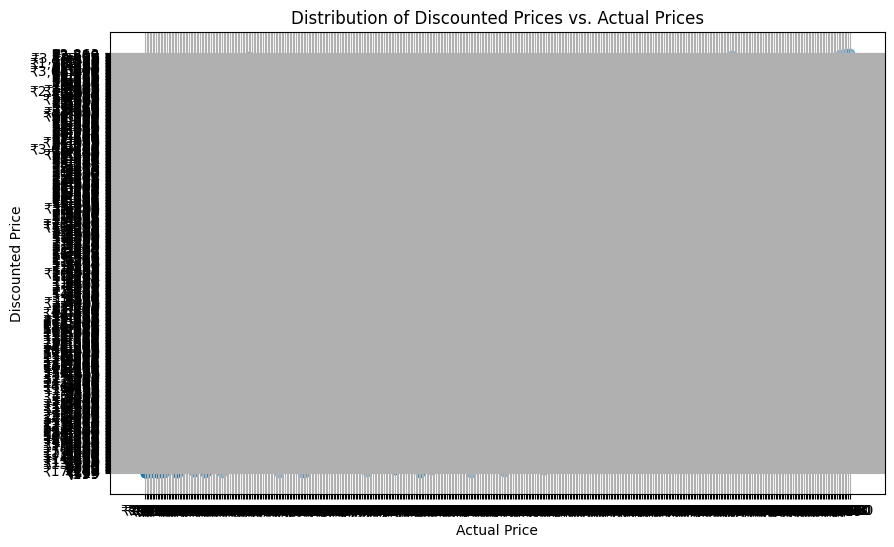

In [19]:
# Create a scatter plot of discounted prices vs. actual prices
plt.figure(figsize=(10, 6))
plt.scatter(df['actual_price'], df['discounted_price'], alpha=0.5)
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.grid(True)
plt.show()


solution 4:

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    42.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        56.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           46.5
                                                                                                                          ... 
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         0.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidIn

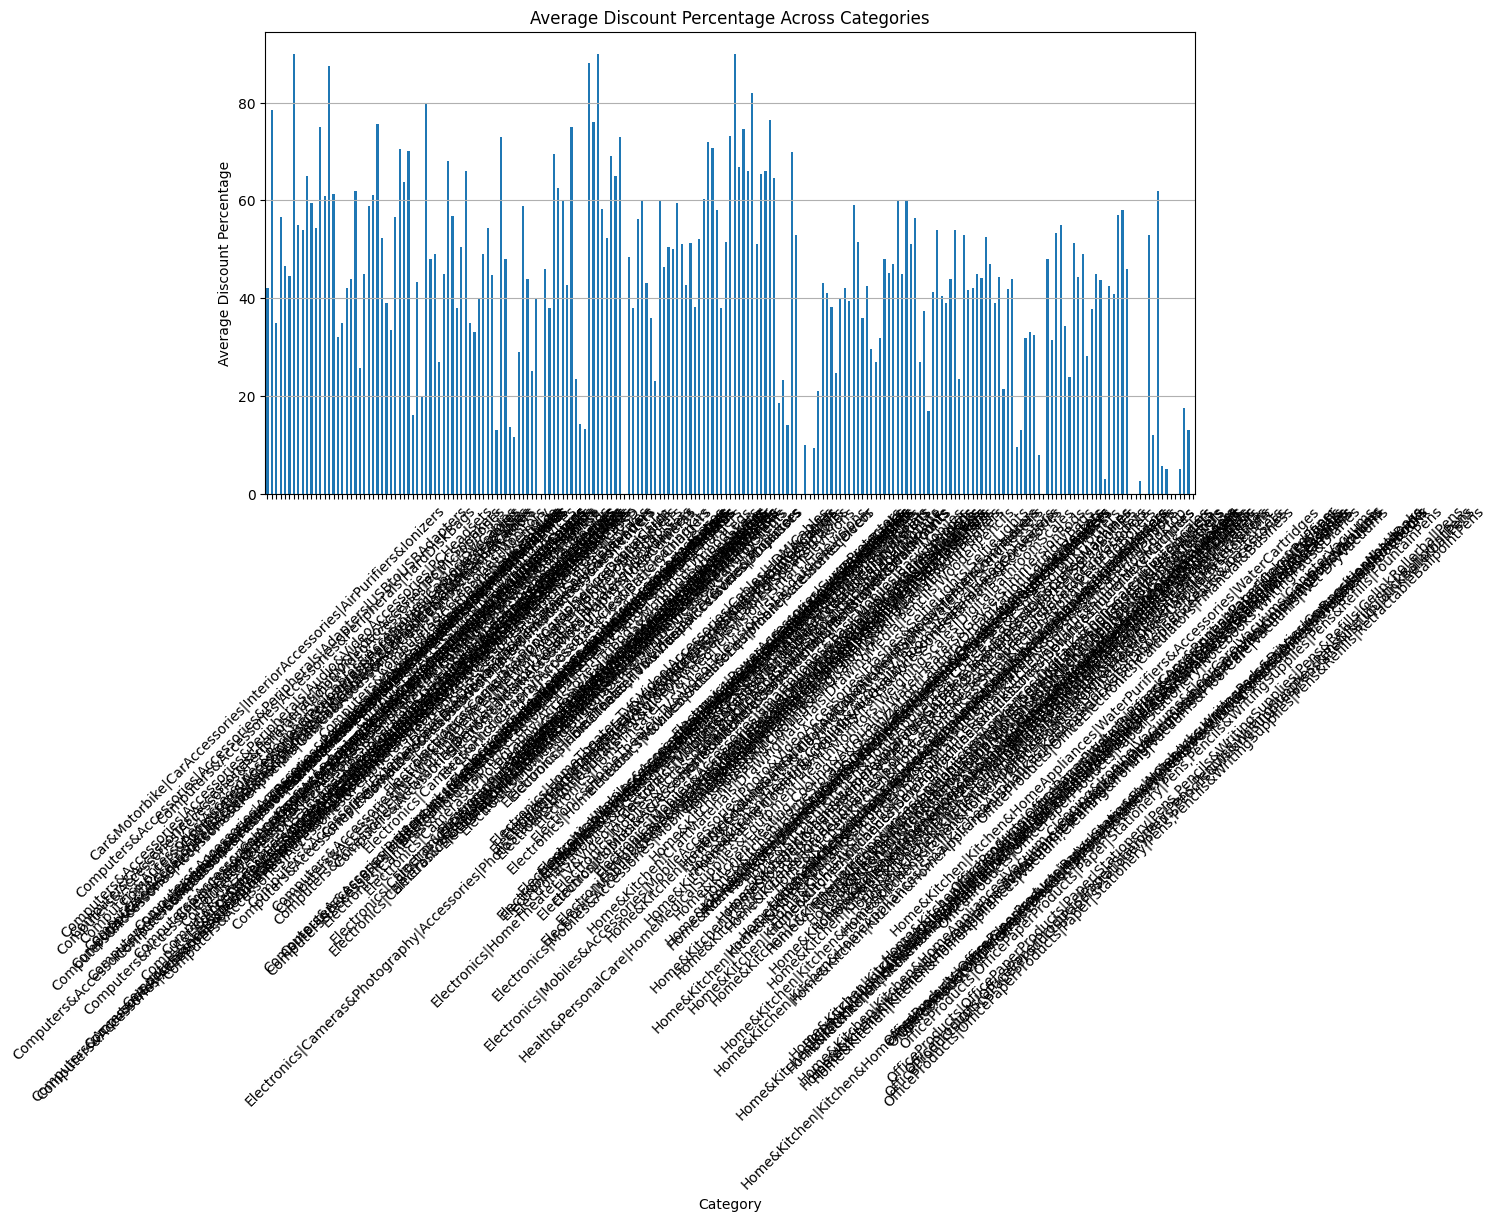

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert discount_percentage to numeric, handling errors only if needed
if df['discount_percentage'].dtype == object:  # Check if it's still a string column
    df['discount_percentage'] = pd.to_numeric(df['discount_percentage'].str.rstrip('%'), errors='coerce')

# Group by category and calculate the average discount percentage
average_discount_by_category = df.groupby('category')['discount_percentage'].mean()

# Print the result
print(average_discount_by_category)

# Create a bar plot of the average discount percentage for each category
plt.figure(figsize=(12, 6))
average_discount_by_category.plot(kind='bar')  # Use the correct variable name for plotting
plt.title('Average Discount Percentage Across Categories')
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

solution 5 :

In [26]:
# Count the occurrences of each product name
product_name_counts = df['product_name'].value_counts().sort_values(ascending=False)

# Print the most popular product names
print(product_name_counts.head(10))


product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                            5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                     4
Ambrane 60W / 3A Fast Charging Output Cable with Type-C to USB for Mobile, Neckband, True Wireless Earphone Charging, 480mbps Data Sync Speed, 1m Length (ACT - AZ10, Black)                         3
Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                      3
Fire-Boltt India's No 1 Smartwatch Brand Talk 2 Bluetooth Calling Smartwatch with Dual Button, Hands On Voice Assistance, 60 Sports Modes, in Built Mic & Speaker with IP68 Rating             

solution 6:

In [27]:
from collections import Counter

# Extract keywords from product names
keywords = []
for name in df['product_name']:
    keywords.extend(name.split())

# Count the occurrences of each keyword
keyword_counts = Counter(keywords)

# Get the most common keywords
most_common_keywords = keyword_counts.most_common(10)

# Print the most common keywords
print(most_common_keywords)


[('with', 718), ('for', 614), ('|', 457), ('&', 432), ('USB', 342), ('and', 310), ('Cable', 306), ('-', 220), ('Charging', 212), ('Fast', 208)]


solution 7:

In [33]:
import pandas as pd
df['rating_count'] = pd.to_numeric(df['rating_count'].astype(str).str.replace(',', ''), errors='coerce')

# Sort the dataframe by rating and rating_count to find the most popular reviews
most_popular = df.sort_values(by=['rating', 'rating_count'], ascending=[False, False])

# Display the top 10 most popular products
print(most_popular[['product_name', 'rating', 'rating_count']].head(10))

# Sort the dataframe by rating and rating_count to find the most popular reviews
most_popular = df.sort_values(by=['rating', 'rating_count'], ascending=[False, False])

# Display the top 10 most popular products
print(most_popular[['product_name', 'rating', 'rating_count']].head(10))

                                           product_name  rating  rating_count
775   Amazon Basics Wireless Mouse | 2.4 GHz Connect...     5.0          23.0
174   Syncwire LTG to USB Cable for Fast Charging Co...     5.0           5.0
324   REDTECH USB-C to Lightning Cable 3.3FT, [Apple...     5.0           NaN
1145  Swiffer Instant Electric Water Heater Faucet T...     4.8       53803.0
1299  Instant Pot Air Fryer, Vortex 2QT, Touch Contr...     4.8        3964.0
1201  Oratech Coffee Frother electric, milk frother ...     4.8          28.0
459   Spigen EZ Fit Tempered Glass Screen Protector ...     4.7        7779.0
249   Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...     4.7        5935.0
1388  Campfire Spring Chef Prolix Instant Portable W...     4.7        2591.0
1275  Multifunctional 2 in 1 Electric Egg Boiling St...     4.7        2300.0
                                           product_name  rating  rating_count
775   Amazon Basics Wireless Mouse | 2.4 GHz Connect...     5.0 

solution 8:

The correlation between discounted price and rating is: 0.12033741712288548


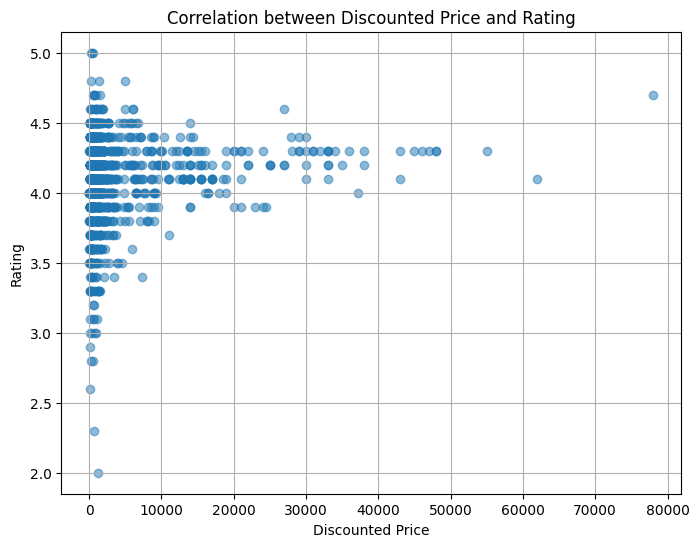

In [35]:
df['discounted_price'] = pd.to_numeric(df['discounted_price'].str.replace('₹', '').str.replace(',', ''), errors='coerce')

# Now calculate the correlation
correlation = df['discounted_price'].corr(df['rating'])

# Print the correlation
print(f"The correlation between discounted price and rating is: {correlation}")

# Create a scatter plot to visualize the correlation
plt.figure(figsize=(8, 6))
plt.scatter(df['discounted_price'], df['rating'], alpha=0.5)
plt.title('Correlation between Discounted Price and Rating')
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

solution 9:

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|Components|Memory                                     4.5
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


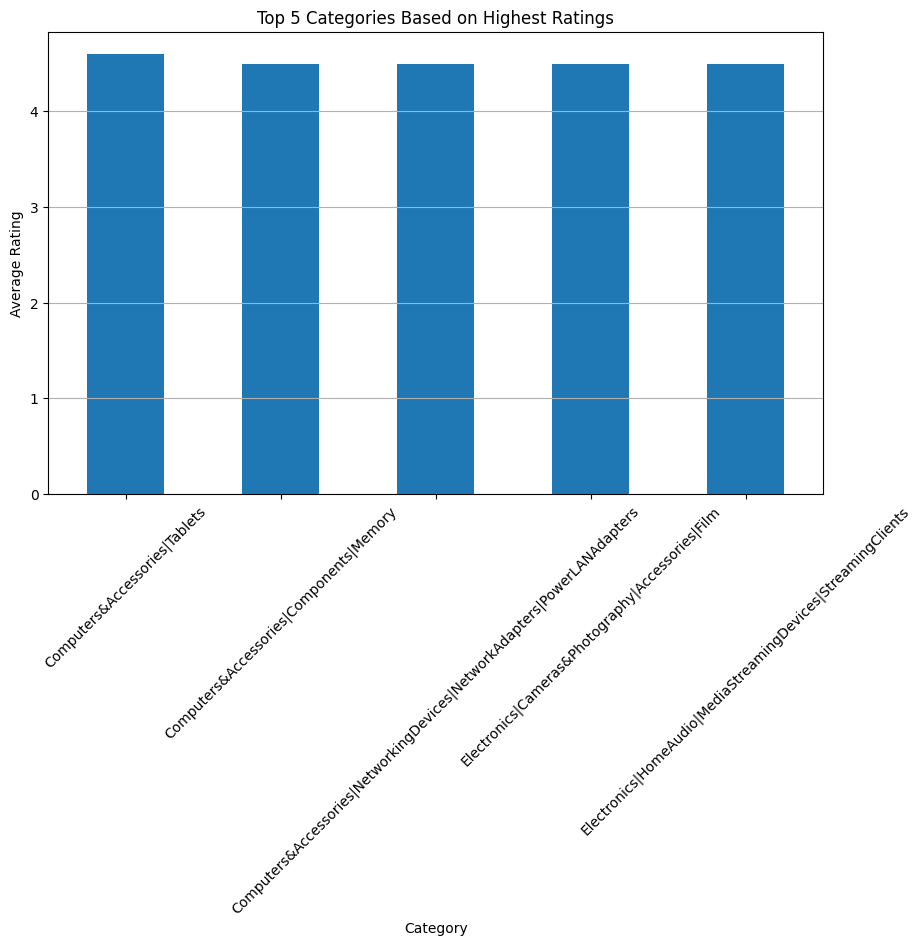

In [36]:
# Group by category and calculate the average rating
average_ratings = df.groupby('category')['rating'].mean()

# Get the top 5 categories with the highest ratings
top_5_categories = average_ratings.nlargest(5)

# Print the top 5 categories
print(top_5_categories)

# Create a bar plot of the top 5 categories
plt.figure(figsize=(10, 6))
top_5_categories.plot(kind='bar')
plt.title('Top 5 Categories Based on Highest Ratings')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


solution 10

In [38]:
# Print insights and recommendations
print("\nPotential Areas for Improvement or Optimization:")

correlation = df['discounted_price'].corr(df['rating'])
print(f"- The correlation between discounted price and rating is: {correlation}")
if correlation < 0:
    print("  Consider re-evaluating the pricing strategy to ensure discounts positively impact ratings.")

print("\n- Analyze the distribution of discount percentages across categories.")
print("  Identify categories with lower discount percentages and consider increasing discounts to boost sales.")
print("\n- Analyze the most popular product keywords.")
print("  Optimize product descriptions and titles to improve search visibility.")

print("\n- Analyze customer reviews to identify common issues and areas for improvement in product quality or customer service.")



Potential Areas for Improvement or Optimization:
- The correlation between discounted price and rating is: 0.12033741712288548

- Analyze the distribution of discount percentages across categories.
  Identify categories with lower discount percentages and consider increasing discounts to boost sales.

- Analyze the most popular product keywords.
  Optimize product descriptions and titles to improve search visibility.

- Analyze customer reviews to identify common issues and areas for improvement in product quality or customer service.


EDA 4 :

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/spotify.csv")
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [44]:
df = pd.read_csv("/content/spotify.csv")
print ("null values:\n",df.isnull().sum())
spotify = df.dropna(inplace=True)

print("\nDuplicate rows:",df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("\nCleaned dataframe shape:",df.shape)

null values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Duplicate rows: 27

Cleaned dataframe shape: (413, 5)


solution 2 :

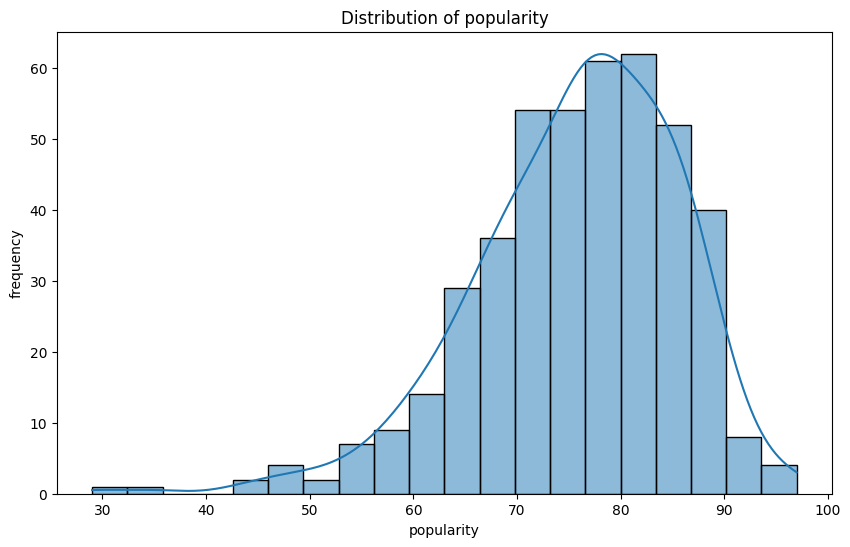

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/spotify.csv")

# Check for variations in column name case
if 'popularity' not in df.columns:
    # Try different cases
    if 'Popularity' in df.columns:
        df = df.rename(columns={'Popularity': 'popularity'})
    elif 'POPULARITY' in df.columns:
        df = df.rename(columns={'POPULARITY': 'popularity'})
    else:
        # If none of the above cases match, print the available columns for debugging
        print("Available columns in the DataFrame:", df.columns)
        raise KeyError(f"'popularity' column not found. Check the column names in the CSV file.")

# Now try plotting again:
plt.figure(figsize=(10,6))
sns.histplot(df['popularity'],kde=True)
plt.title('Distribution of popularity')
plt.xlabel('popularity')
plt.ylabel('frequency')
plt.show()

solution 3 :

In [55]:
import plotly.express as px

# Create the scatter plot
fig = px.scatter(df, x="popularity", y="Duration (ms)",
                 title="Relationship between Popularity and Duration of Tracks")

# Show the plot
fig.show()

solution 4 :

The artist with the most tracks is: Drake


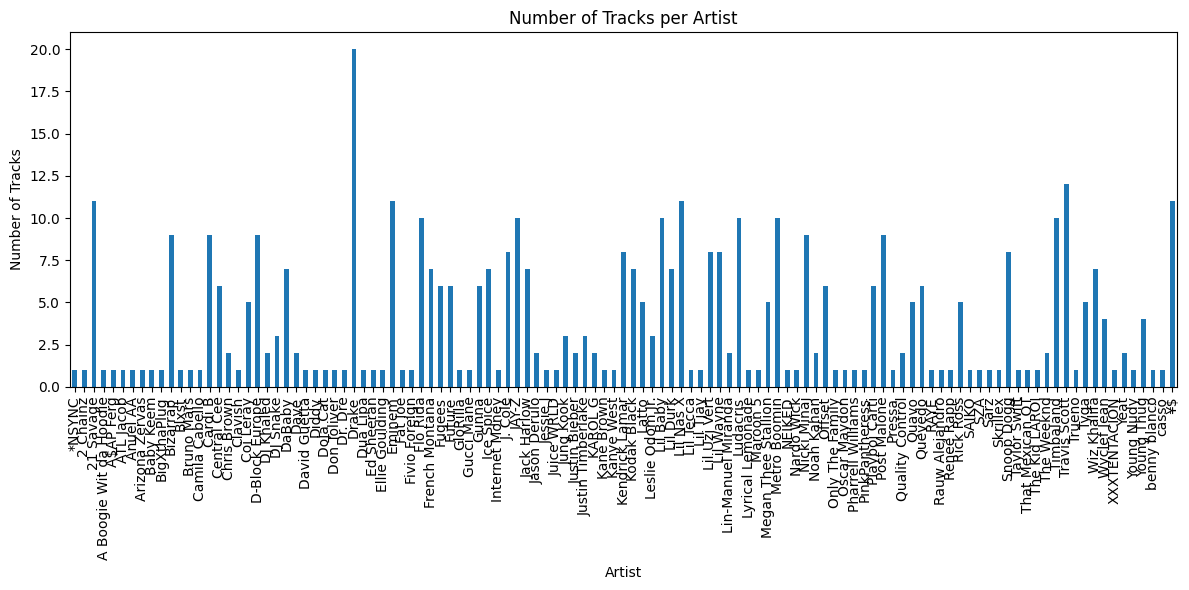

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
# Calculate the number of tracks per artist
artist_track_counts = df.groupby('Artist')['Track Name'].count()

# Find the artist with the highest number of tracks
artist_with_most_tracks = artist_track_counts.idxmax()
print(f"The artist with the most tracks is: {artist_with_most_tracks}")

# Create a countplot to visualize track counts for each artist
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
artist_track_counts.plot(kind='bar')
plt.xlabel("Artist")
plt.ylabel("Number of Tracks")
plt.title("Number of Tracks per Artist")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout() # prevent labels from overlapping
plt.show()

solution 5 :

In [61]:

df_sorted = df.sort_values('popularity', ascending=False)

# Get the top 5 most popular tracks
top_5_tracks = df_sorted.head(5)

# Display the artist and track name for the top 5 tracks
print(top_5_tracks[['Artist', 'Track Name']])

           Artist                  Track Name
40    Jack Harlow                 Lovin On Me
70      21 Savage                      redrum
280            ¥$                    CARNIVAL
260            ¥$                    CARNIVAL
282  Travis Scott  FE!N (feat. Playboi Carti)


solution 6:

In [64]:
artist_popularity = df.groupby('Artist')['popularity'].mean()

# Sort the artists by average popularity in descending order and get the top 5
top_5_artists = artist_popularity.sort_values(ascending=False).head(5)

# Display the average popularity for each of the top 5 artists
print(top_5_artists)

# Identify the artist with the highest average popularity among the top 5
highest_popularity_artist = top_5_artists.idxmax()
print(f"\nThe artist with the highest average popularity among the top 5 is: {highest_popularity_artist}")


Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    87.000000
¥$              86.090909
Name: popularity, dtype: float64

The artist with the highest average popularity among the top 5 is: cassö


solution 7 :

In [67]:
top_tracks = df.loc[df.groupby('Artist')['popularity'].idxmax()]

# Get the top 5 most popular artists
top_5_artists = df.groupby('Artist')['popularity'].mean().sort_values(ascending=False).head(5).index

# Filter the top tracks to include only the top 5 artists
top_tracks_top_5_artists = top_tracks[top_tracks['Artist'].isin(top_5_artists)]

# Display the track name for each of the top 5 artists
print(top_tracks_top_5_artists[['Artist', 'Track Name']])

           Artist                    Track Name
200  David Guetta            Baby Don't Hurt Me
30   Travis Scott    FE!N (feat. Playboi Carti)
241        Trueno  Mamichula - con Nicki Nicole
140         cassö                         Prada
260            ¥$                      CARNIVAL


solution 8 :

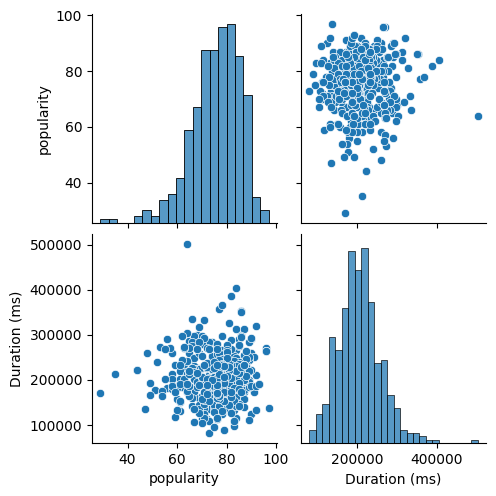

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for the pair plot
numerical_cols = ['popularity', 'Duration (ms)']

# Create the pair plot
sns.pairplot(df[numerical_cols])
plt.show()

Solution 9 :

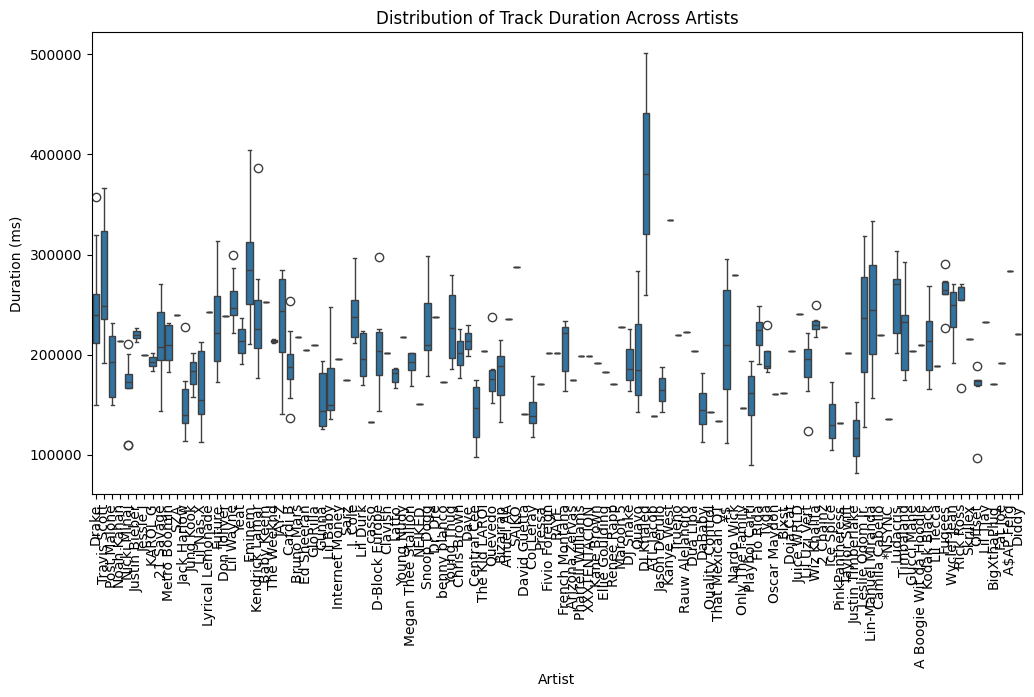

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.boxplot(x='Artist', y='Duration (ms)', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of Track Duration Across Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.show()


solution 10:

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categor

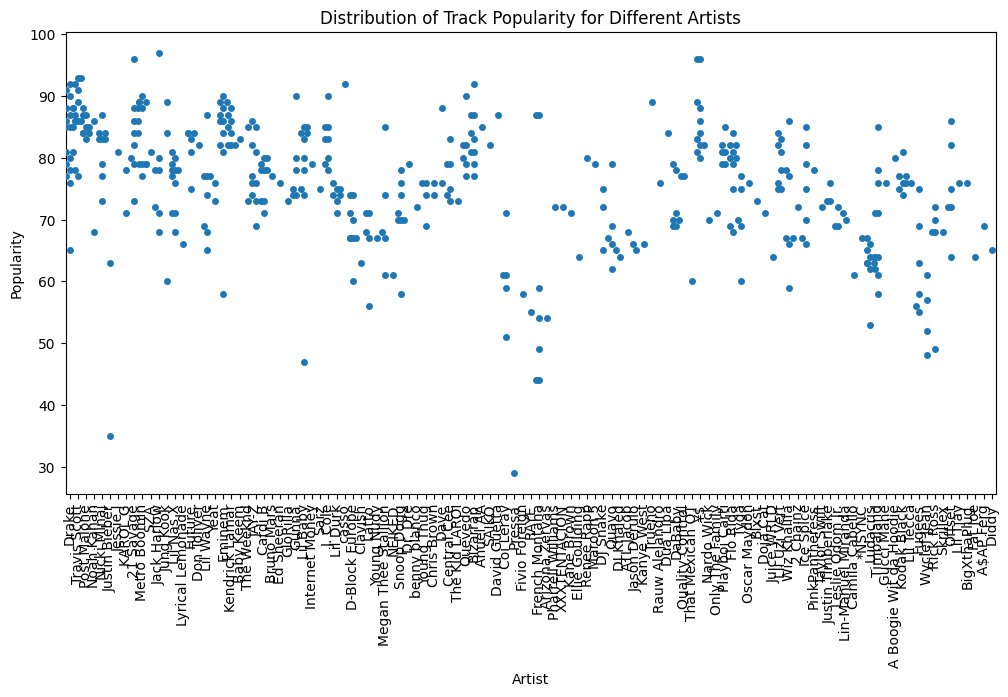

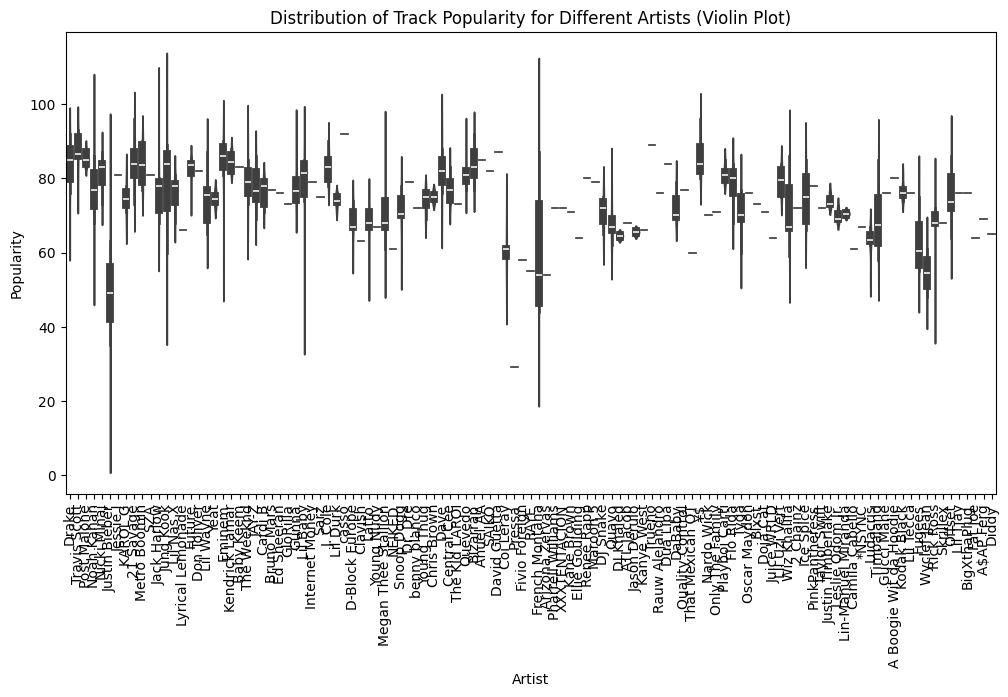

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the swarm plot
plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization
sns.swarmplot(x='Artist', y='popularity', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Distribution of Track Popularity for Different Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.show()

# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='popularity', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Track Popularity for Different Artists (Violin Plot)')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.show()